### 군집분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.cluster import KMeans, DBSCAN

In [4]:
df_raw = pd.read_csv('/home/piai/Downloads/직무능력평가.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


### 데이터 전처리 scaling

In [5]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [6]:
### 데이터 전처리 역할정의
#목표변수
df_raw_y = df_raw_scaled[:,0]

#설명변수
df_raw_x = df_raw_scaled[:,1::]

### Dendrogram

Text(0, 0.5, 'sample index')

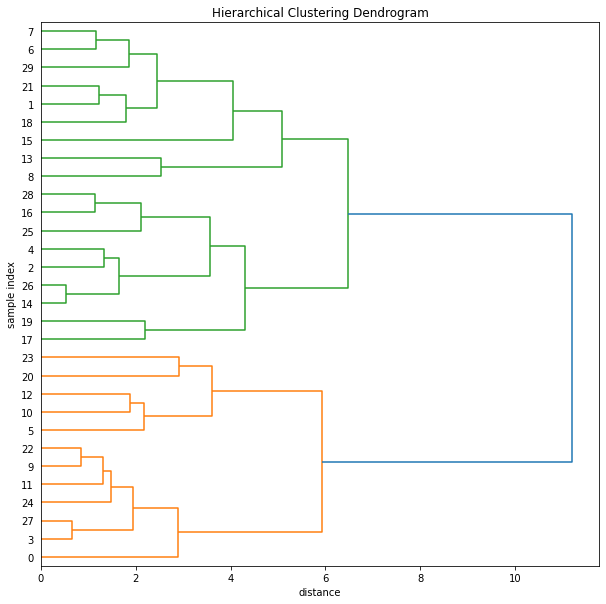

In [26]:
#연결: ward, 거리계산 : Euclidean
Z_ward = linkage(df_raw_x, method = 'ward', metric = 'euclidean')

#연결: average, 거리계산 : Euclidean
Z_average = linkage(df_raw_x, method = 'average', metric = 'euclidean')

#연결: average, 거리계산 : minkowski
Z_Minkowski = linkage(df_raw_x, method = 'average', metric = 'minkowski')

#덴드로그램[연결:ward, 거리계산: euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#dataframe 변경 : z_ward, z_average, z_minkowski
dendrogram(Z_ward, leaf_font_size = 10, orientation = 'right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

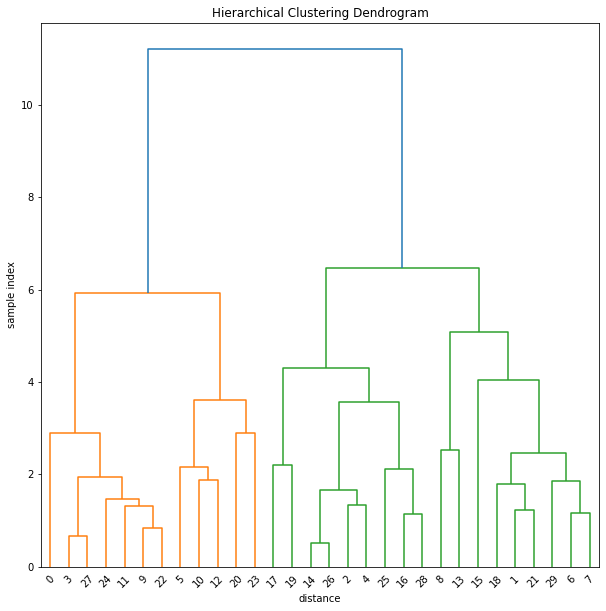

In [30]:
#덴드로그램[연결:ward, 거리계산: euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#dataframe 변경 : z_ward, z_average, z_minkowski
dendrogram(Z_ward, leaf_font_size = 10, orientation = 'top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [27]:
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

### 계층형 군집 생성

In [32]:
#linkage 함수를 통해 얻은 z_ward 행렬 데이터를 이용하여 군집 생성 (t = 군집의 수)
cluster_hierarchical = fcluster(Z = Z_ward, t= 5, criterion = 'distance')

#데이터에 계층형 군집 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,5
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,5
4,81,78,56,66,71,83,47,3,2


### 군집별 데이터 요약

In [34]:
#집계 함수를 이용한 군집별 데이터 요약
df_summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min', 'mean','max'])

#집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_hc.columns.get_level_values(0)
level1 = df_summary_hc.columns.get_level_values(1)
df_summary_hc.columns = level0 + '_' + level1
df_summary_hc.reset_index(inplace = True)
df_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,ClusterKmeans_min,ClusterKmeans_mean,ClusterKmeans_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,66,74,81.143,92,33,38.571,45,5,5.000,5
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,49,60.000,67,25,35.000,49,1,2.600,3
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,88,74,79.000,86,46,54.667,72,2,2.000,2
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,71,77,80.000,83,31,33.000,35,4,4.000,4
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,75,54,72.000,85,35,40.714,47,1,1.143,2


### K-평균 군집분석

In [36]:
#최대 군집 생성개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    #각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
    
df_error = pd.DataFrame({'NumberofCluster': cluster_range, 'Error': clus_error})
df_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.636837
3,4,79.209833
4,5,67.407163
5,6,59.147748
6,7,51.324314
7,8,43.686139
8,9,40.295103
9,10,34.467519


### 군집별 군집 중시점까지 거리 제곱합을 시각화

Text(0, 0.5, 'Sum of squared distance')

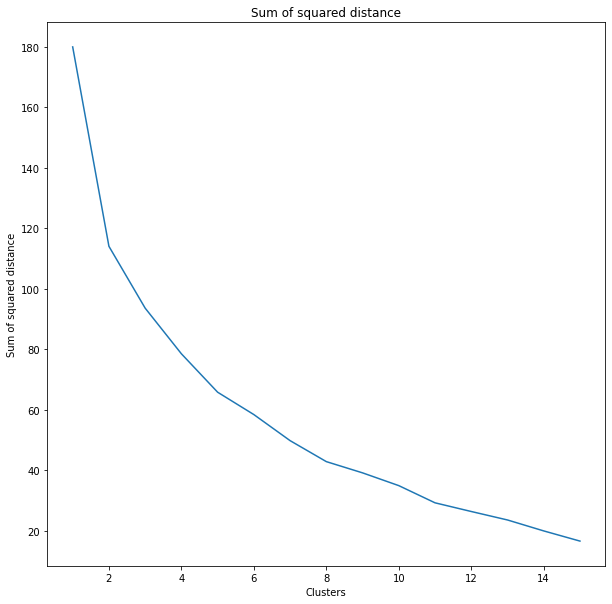

In [31]:
plt.figure(figsize = (10,10))
plt.plot(df_error['NumberofCluster'], df_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

### 계층형 군집분석으로 적정 k 순을 잡은 다음 k-means에 적용!

### k -평균 군집번호 생성

In [21]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,5
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,5
4,81,78,56,66,71,83,47,3,2


### k 평균 군집별 데이터 요약

In [37]:
df_summary_km = df_raw.drop('ClusterHierarchical', axis = 1, inplace =False).groupby('ClusterKmeans').agg(['min','mean','max'])
#집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_km.columns.get_level_values(0)
level1 = df_summary_km.columns.get_level_values(1)
df_summary_km.columns = level0 + '_' + level1
df_summary_km.reset_index(inplace = True)
df_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,58,69.000,82,53,70.286,90,39,48.143,53,...,72,58,63.857,70,54,69.429,80,34,39.000,47
1,2,50,71.200,85,58,73.500,85,46,61.600,71,...,75,55,74.400,88,74,79.600,86,46,53.800,72
2,3,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45


* y가 없어도 됨. 많이 사용. k 를 결정하기가 난감하다는 문제가 있기 때문에 계층형 먼저 진행한다음 kmeans 사용하기